<a href="https://colab.research.google.com/github/TechPius/cohort_analysis/blob/main/ppk_amdari_01_project_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Project Title
 Cohort Analysis for assessing customer retention in e-commerce industry

# Cohort Analysis
Cohort analysis involves dividing users into distinct groups or cohorts based on certain criteria. In this case study, theses cohorts are defined by the time of user acquisition by grouping users together based on time of acquisition. we can study how different cohorts behave in terms of engagement and retention

## Cohort Analysis Example
You might create cohorts based on the month users first signed up for your service. You can then track how each cohorts activity such as their conversion rate or lifetime value evolves over time. This approach allows you to identify trends, anomalies and areas where you may need to makeadjustments to improve user retention and satisfaction.

## Retention Rate Time-Based Cohort Analysis:


*   create cohorts based on user acquisition dates
*   Measure the percentage of users from each cohort who  continue to engage with your product or serviceover time (e.g after 1 month, 3 months etc)

*   Analyse how retention rates vary across differentcohortsand time periods enabling you to identify trends and make data driven decisions
This Analysis can reveal whether certain cohorts have better or worse retention rates, helping the business understand the factors contributiongto user retention or attention. it can also assist in optimizing marketing, product development and customer support strategies






In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/TechPius/cohort_analysis.git

Cloning into 'cohort_analysis'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 506.89 KiB | 1.96 MiB/s, done.


## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Load Dataset

In [5]:
Dataset_ecommerce =pd.read_csv('/content/drive/MyDrive/Dataset_ecommerce.csv')
Dataset_ecommerce.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


## Descriptive Statistics

In [6]:
Dataset_ecommerce.describe(include='all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


## check for missing values

In [7]:
Dataset_ecommerce.isnull().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,135080
StockCode,0
Description,0
Quantity,0
UnitPrice,0
Country,0


In [8]:
Dataset_ecommerce.dropna(inplace=True)
Dataset_ecommerce.isnull().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,0
StockCode,0
Description,0
Quantity,0
UnitPrice,0
Country,0


In [9]:
#get more information on the data
Dataset_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
#convert invoice date to datetime format
Dataset_ecommerce['InvoiceDate'] = pd.to_datetime(Dataset_ecommerce['InvoiceDate'])
Dataset_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## Exploratory Data Analysis

In [11]:
quantity_by_country = Dataset_ecommerce.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values('Quantity',ascending=False).reset_index()
quantity_by_country

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206
5,1,Benin,738133
6,27,Zimbabwe,737522
7,19,Somalia,736219
8,0,Algeria,736181
9,18,Sierra Leone,735477


In [12]:
#visualize top 10 countries where most products are sold
top_ten_countries = Dataset_ecommerce.groupby(['Country'])['Quantity'].sum().reset_index()
top_ten_countries.head(10)




,Country,Quantity
0,Algeria,736181
1,Benin,738133
2,Burkina Faso,728332
3,Cameroon,730881
4,Cote d'Ivoire,740229
5,Egypt,729299
6,Ethiopia,732940
7,Ghana,735354
8,Kenya,732247
9,Libya,739206


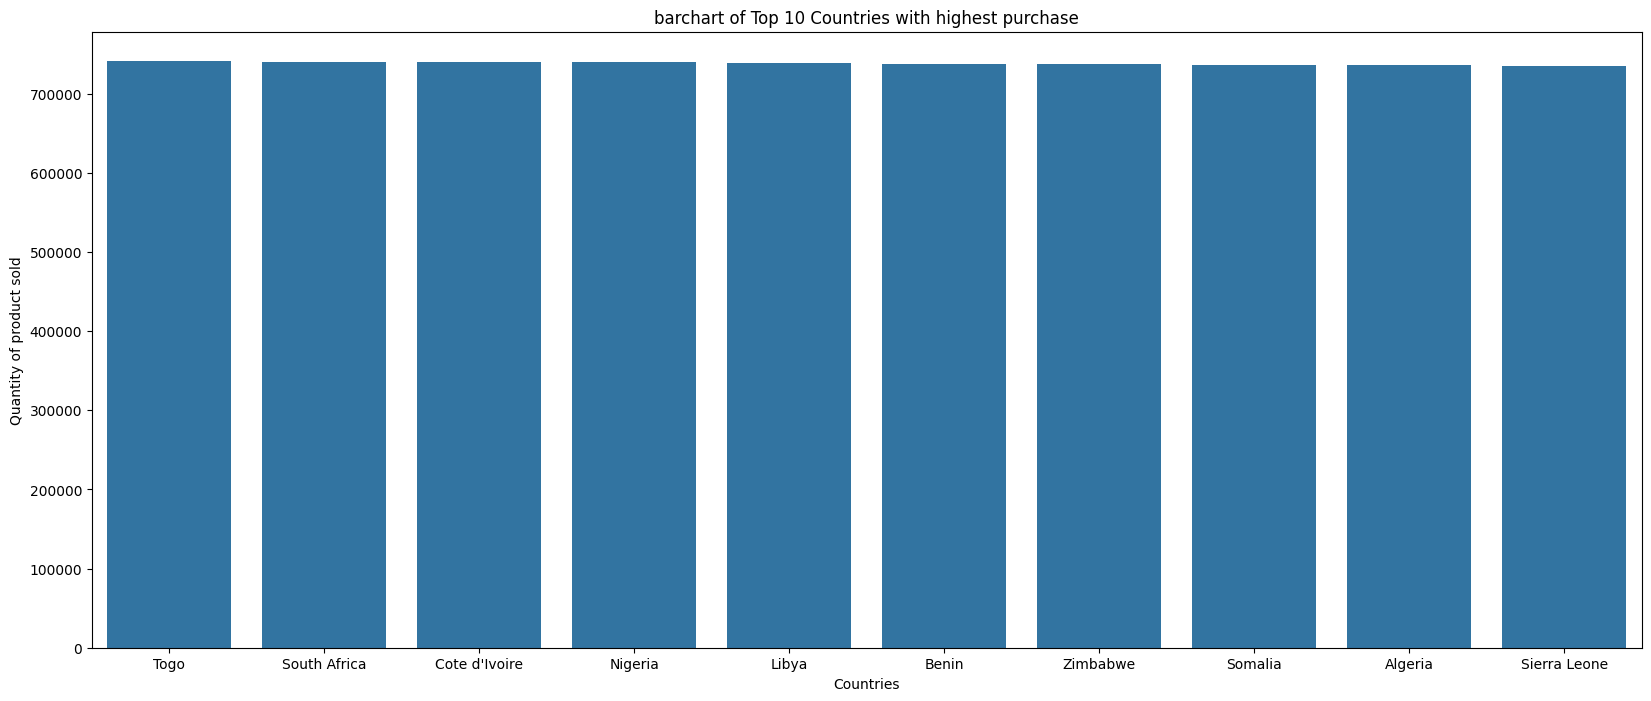

In [13]:
#visualize top 10 countries where  most products are sold
top_ten_country = quantity_by_country.head(10)
#top_ten_countries.head(10)
plt.figure(figsize=(20,8))
ax=sns.barplot(x='Country',y='Quantity',data=top_ten_country.head(10))
plt.xlabel('Countries')
plt.ylabel('Quantity of product sold')
plt.title('barchart of Top 10 Countries with highest purchase')
plt.show()

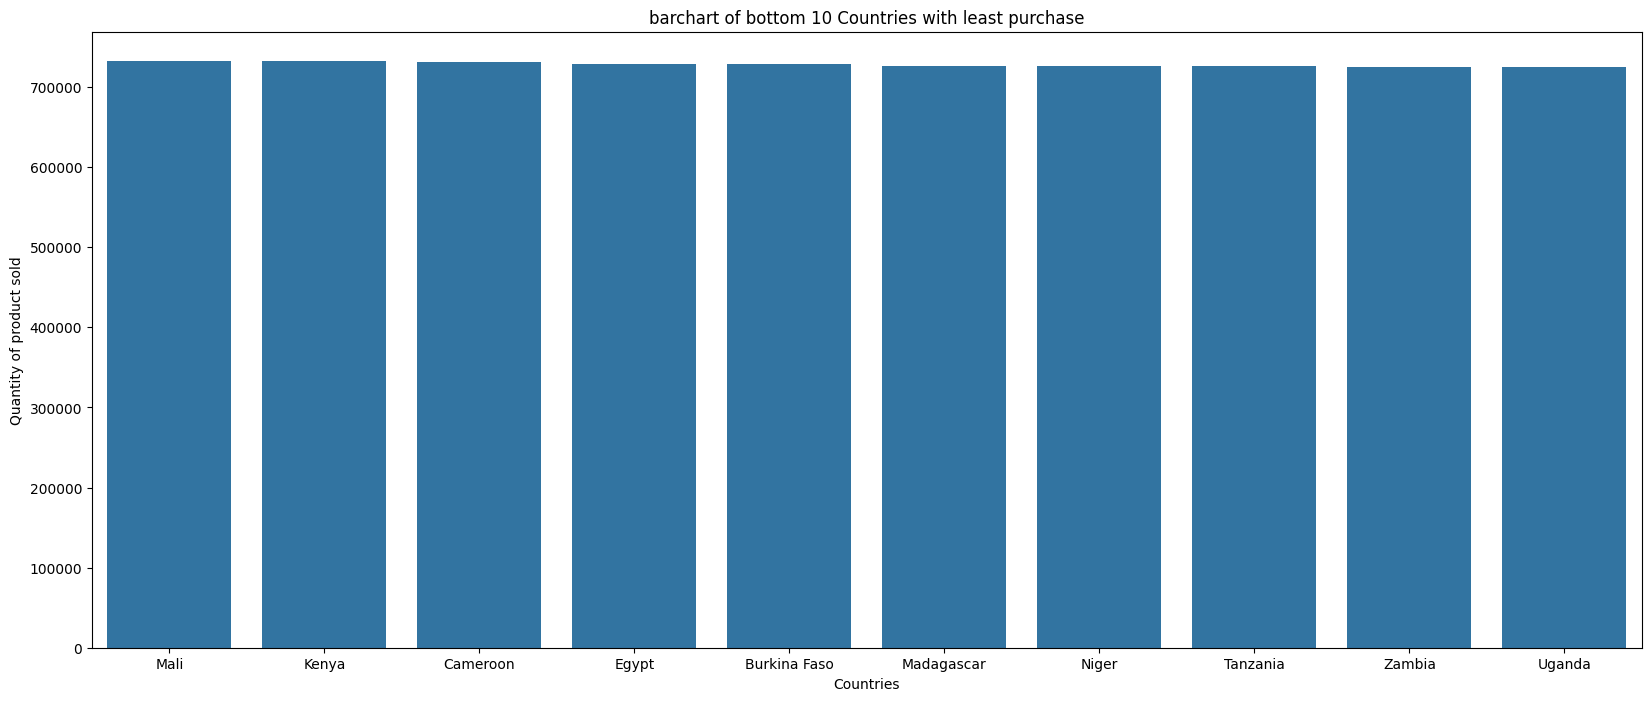

In [14]:
#visualize countries where least number of products are sold
least_ten_country = quantity_by_country.tail(10)
#top_ten_countries.head(10)
plt.figure(figsize=(20,8))
ax=sns.barplot(x='Country',y='Quantity',data=least_ten_country)
plt.xlabel('Countries')
plt.ylabel('Quantity of product sold')
plt.title('barchart of bottom 10 Countries with least purchase')
plt.show()

In [15]:
#Analysis of countries and number of customers
country_to_customer =Dataset_ecommerce.groupby(['Country'])['CustomerID'].nunique().reset_index()
country_to_customer = country_to_customer.sort_values('CustomerID',ascending=False).reset_index()
country_to_customer

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049
5,18,Sierra Leone,3046
6,11,Mali,3044
7,0,Algeria,3043
8,17,Senegal,3040
9,14,Niger,3039


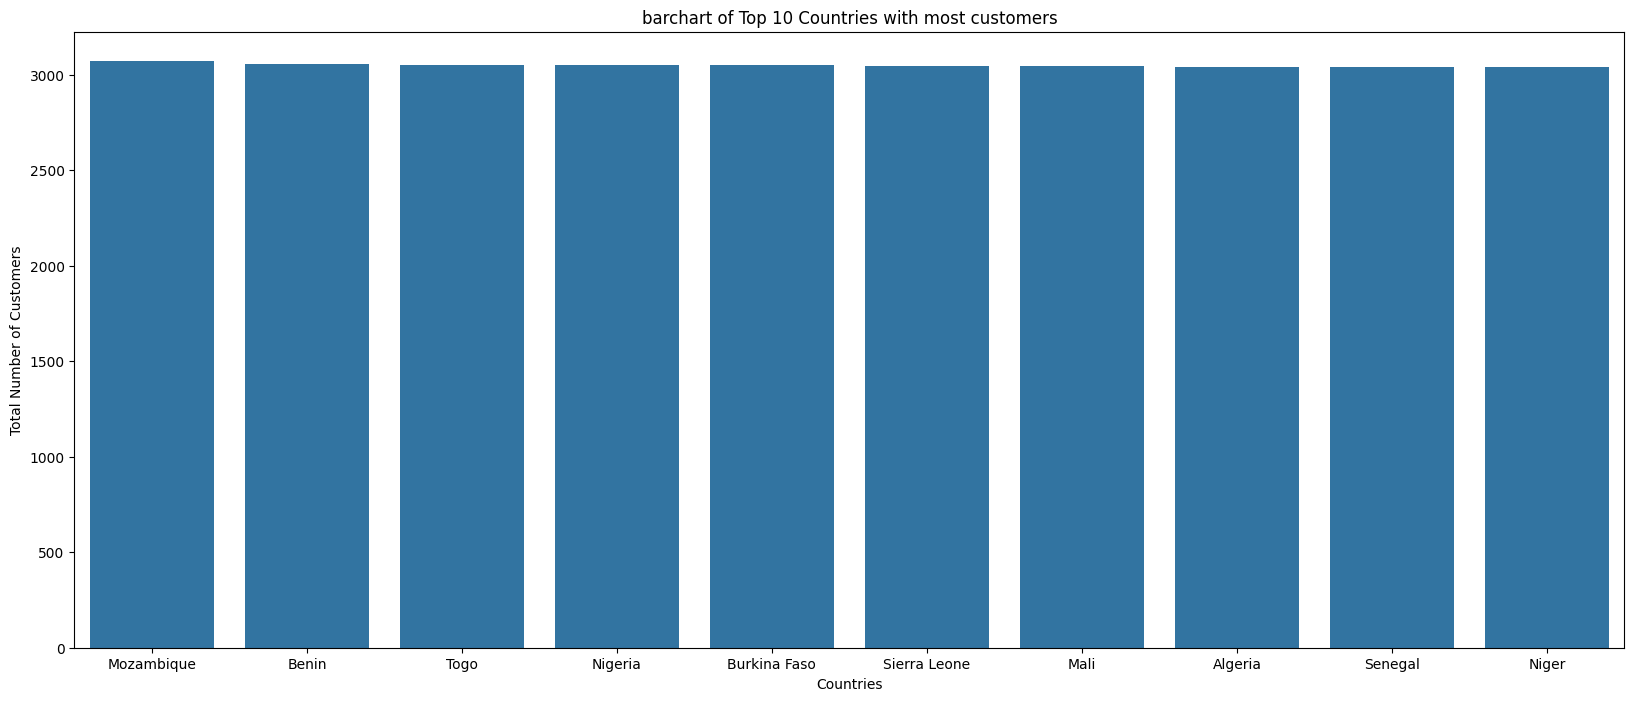

In [16]:
#visualize a plot of top 10 countries with most number of customers
top_ten_country_to_customer = country_to_customer.head(10)
#top_ten_countries.head(10)
plt.figure(figsize=(20,8))
ax=sns.barplot(x='Country',y='CustomerID',data=top_ten_country_to_customer)
plt.xlabel('Countries')
plt.ylabel('Total Number of Customers')
plt.title('barchart of Top 10 Countries with most customers')
plt.show()


# Sales Trend

In [17]:
monthly_sales = Dataset_ecommerce.groupby(Dataset_ecommerce['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_sales

,Quantity
InvoiceDate,
2010-12,1350834
2011-01,1105886
2011-02,1033468
2011-03,1406617
2011-04,1175052
2011-05,1459981
2011-06,1402857
2011-07,1388119
2011-08,1387695


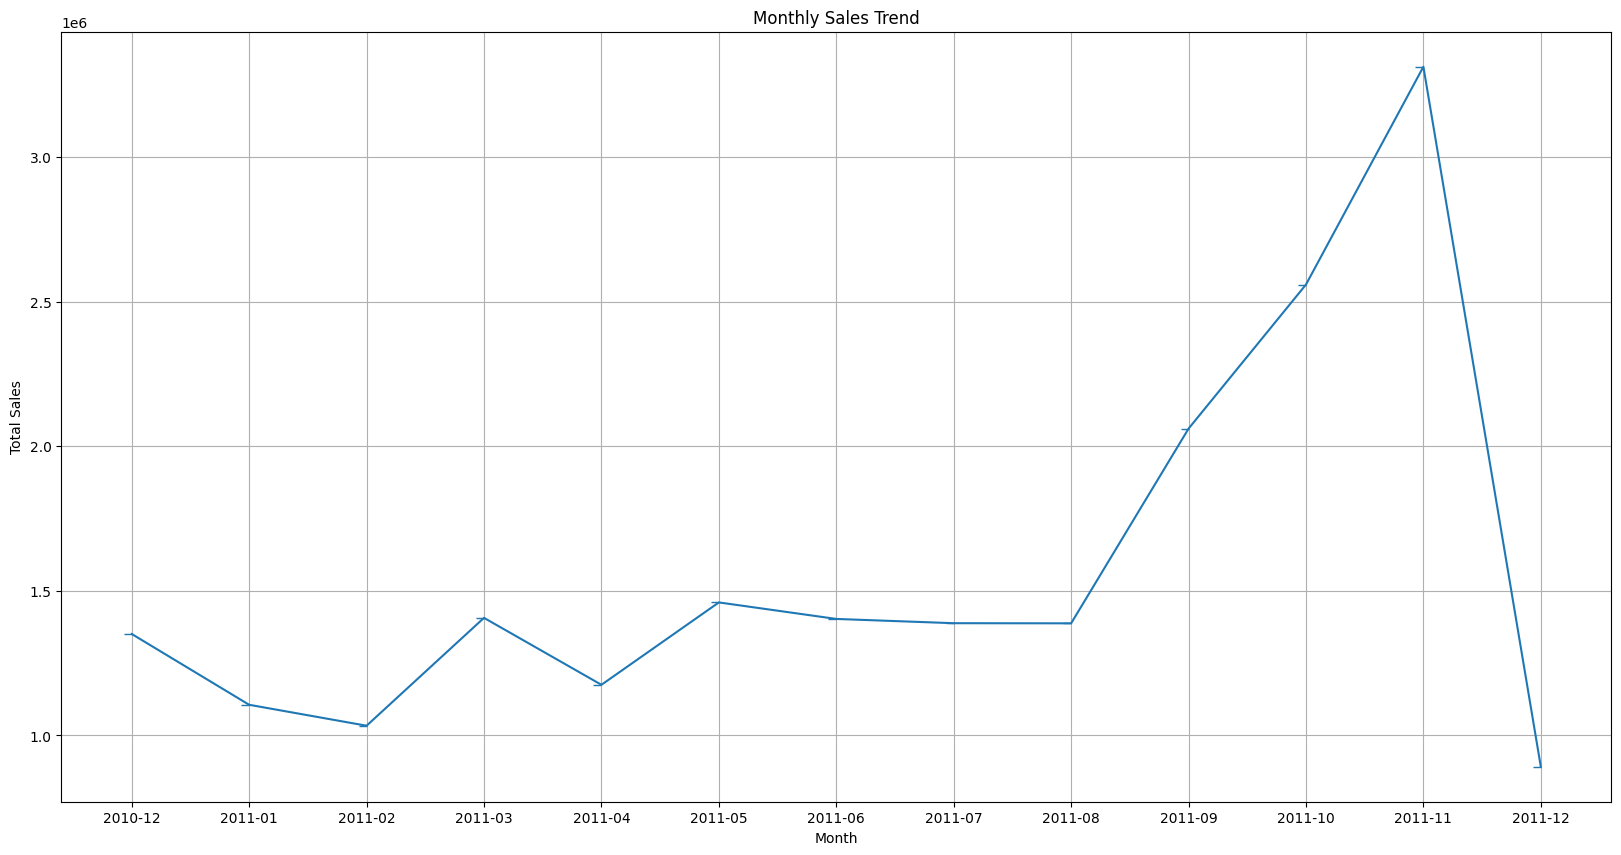

In [18]:
#create a line plot
plt.figure(figsize=(20,10))
plt.plot(monthly_sales.index.strftime('%Y-%m'),monthly_sales.values,marker=0,linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

# Cohort Analysis 1

In [19]:
#Display dataset
Dataset_ecommerce.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [20]:
#create a function to loop throught the data and get InvoiceID and CustomerID
def get_month(x):
  return dt.datetime(x.year,x.month,1)

In [21]:
Dataset_ecommerce['InvoiceDate'] = Dataset_ecommerce['InvoiceDate'].apply(get_month)
Dataset_ecommerce.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [22]:
#create a new column called cohort date where is the first month of transaction
def get_cohort_date(Dataset_ecommerce):
  Dataset_ecommerce['CohortDate'] = Dataset_ecommerce.groupby('CustomerID')['InvoiceDate'].transform('min')
  return Dataset_ecommerce

In [23]:
Dataset_ecommerce_cohort_date= get_cohort_date(Dataset_ecommerce)
Dataset_ecommerce

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,CohortDate
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


In [24]:
#function to get year and month component from Dataset_ecomerce
def get_year_month(Dataset_ecommerce,Col):
  month=Dataset_ecommerce[Col].dt.month
  year=Dataset_ecommerce[Col].dt.year
  return month,year


In [25]:
first_month,first_year = get_year_month(Dataset_ecommerce,'CohortDate')
first_month



,CohortDate
0,12
1,12
2,12
3,12
4,12
...,...
541904,8
541905,8
541906,8
541907,8


In [26]:
first_year

,CohortDate
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
541904,2011
541905,2011
541906,2011
541907,2011


In [27]:
latest_month,latest_year = get_year_month(Dataset_ecommerce,'InvoiceDate')
latest_month

,InvoiceDate
0,12
1,12
2,12
3,12
4,12
...,...
541904,12
541905,12
541906,12
541907,12


In [28]:
latest_year

,InvoiceDate
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
541904,2011
541905,2011
541906,2011
541907,2011


# Cohort Index

#create cohort index



In [29]:
def create_cohort_index(first_month,first_year,latest_month,latest_year):
  year_diff = latest_year - first_year
  month_diff = latest_month - first_month
  cohort_index = year_diff * 12 + month_diff + 1
  return cohort_index

In [30]:
Dataset_ecommerce['CohortIndex'] = create_cohort_index(first_month,first_year,latest_month,latest_year)


In [31]:
Dataset_ecommerce.head(10)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,CohortDate,CohortIndex
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
5,536365,2010-12-01,17850.0,SC7895,Toys,41,45.31,Sierra Leone,2010-12-01,1
6,536365,2010-12-01,17850.0,SC8608,Books,44,39.31,Benin,2010-12-01,1
7,536366,2010-12-01,17850.0,SC3216,Toys,47,77.35,Burkina Faso,2010-12-01,1
8,536366,2010-12-01,17850.0,SC1236,Kitchenware,19,35.11,Nigeria,2010-12-01,1
9,536367,2010-12-01,13047.0,SC4513,Furniture,55,3.21,Cote d'Ivoire,2010-12-01,1


# Pivot Table

In [32]:
cohort_info = Dataset_ecommerce.groupby(['CohortDate','CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_info.rename(columns={'CustomerID':'Number of customers'},inplace=True)
cohort_info

,CohortDate,CohortIndex,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


# Cohort table

In [33]:
cohort_table = cohort_info.pivot_table(index='CohortDate',columns='CohortIndex',values='Number of customers')
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


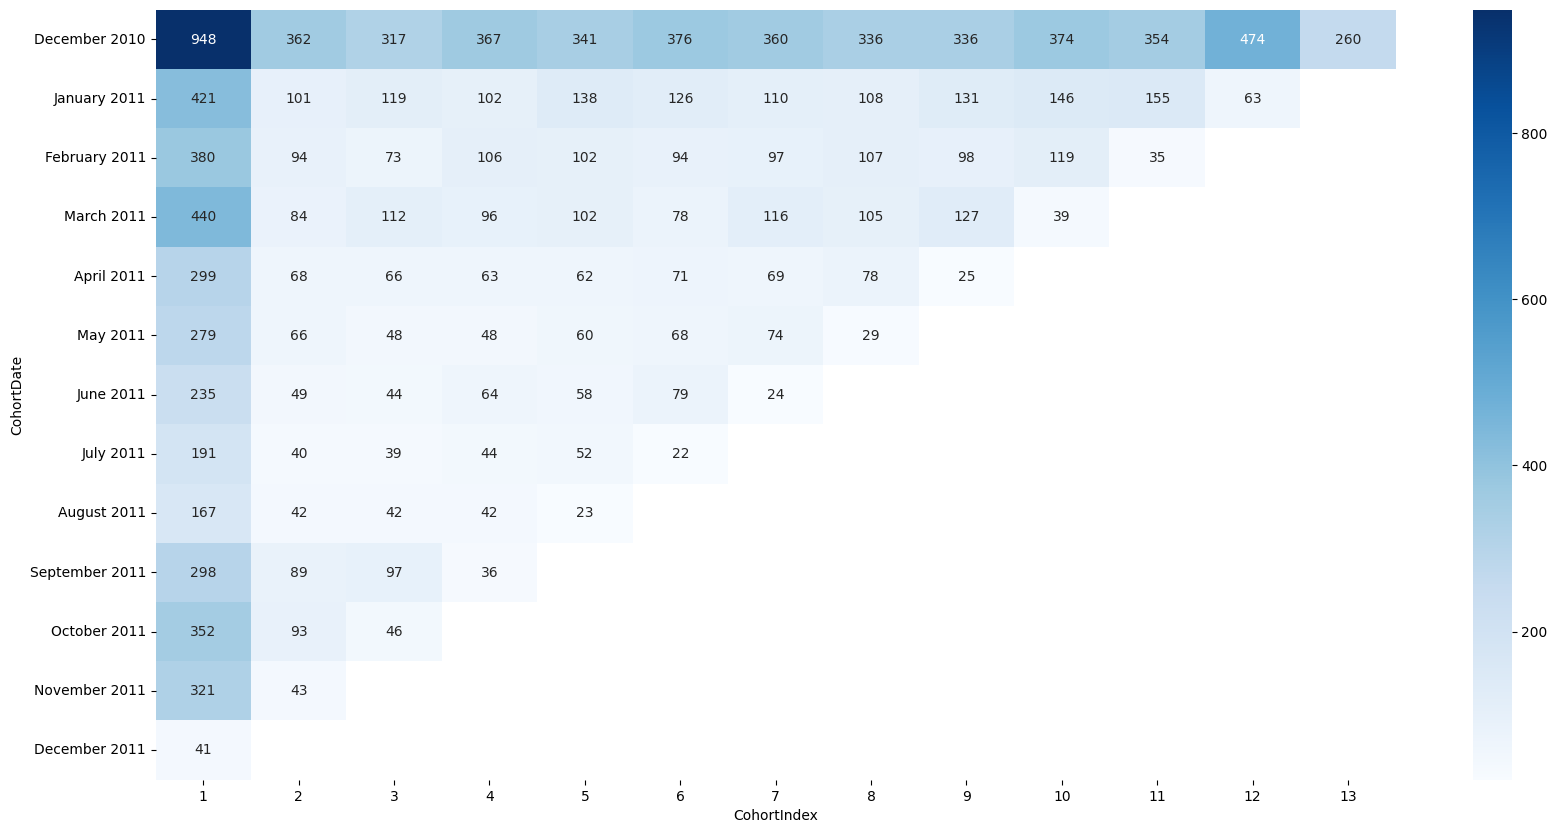

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(cohort_table,annot=True,fmt='.0f',cmap='Blues')
plt.show()


# Cohort Table in %

In [35]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[0,:],axis=1)
new_cohort_table


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December 2010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
January 2011,0.444093,0.279006,0.375394,0.277929,0.404692,0.335106,0.305556,0.321429,0.389881,0.390374,0.437853,0.132911,NaN
February 2011,0.400844,0.259669,0.230284,0.288828,0.299120,0.250000,0.269444,0.318452,0.291667,0.318182,0.098870,NaN,NaN
March 2011,0.464135,0.232044,0.353312,0.261580,0.299120,0.207447,0.322222,0.312500,0.377976,0.104278,NaN,NaN,NaN
April 2011,0.315401,0.187845,0.208202,0.171662,0.181818,0.188830,0.191667,0.232143,0.074405,NaN,NaN,NaN,NaN
May 2011,0.294304,0.182320,0.151420,0.130790,0.175953,0.180851,0.205556,0.086310,NaN,NaN,NaN,NaN,NaN
June 2011,0.247890,0.135359,0.138801,0.174387,0.170088,0.210106,0.066667,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,0.201477,0.110497,0.123028,0.119891,0.152493,0.058511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,0.176160,0.116022,0.132492,0.114441,0.067449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


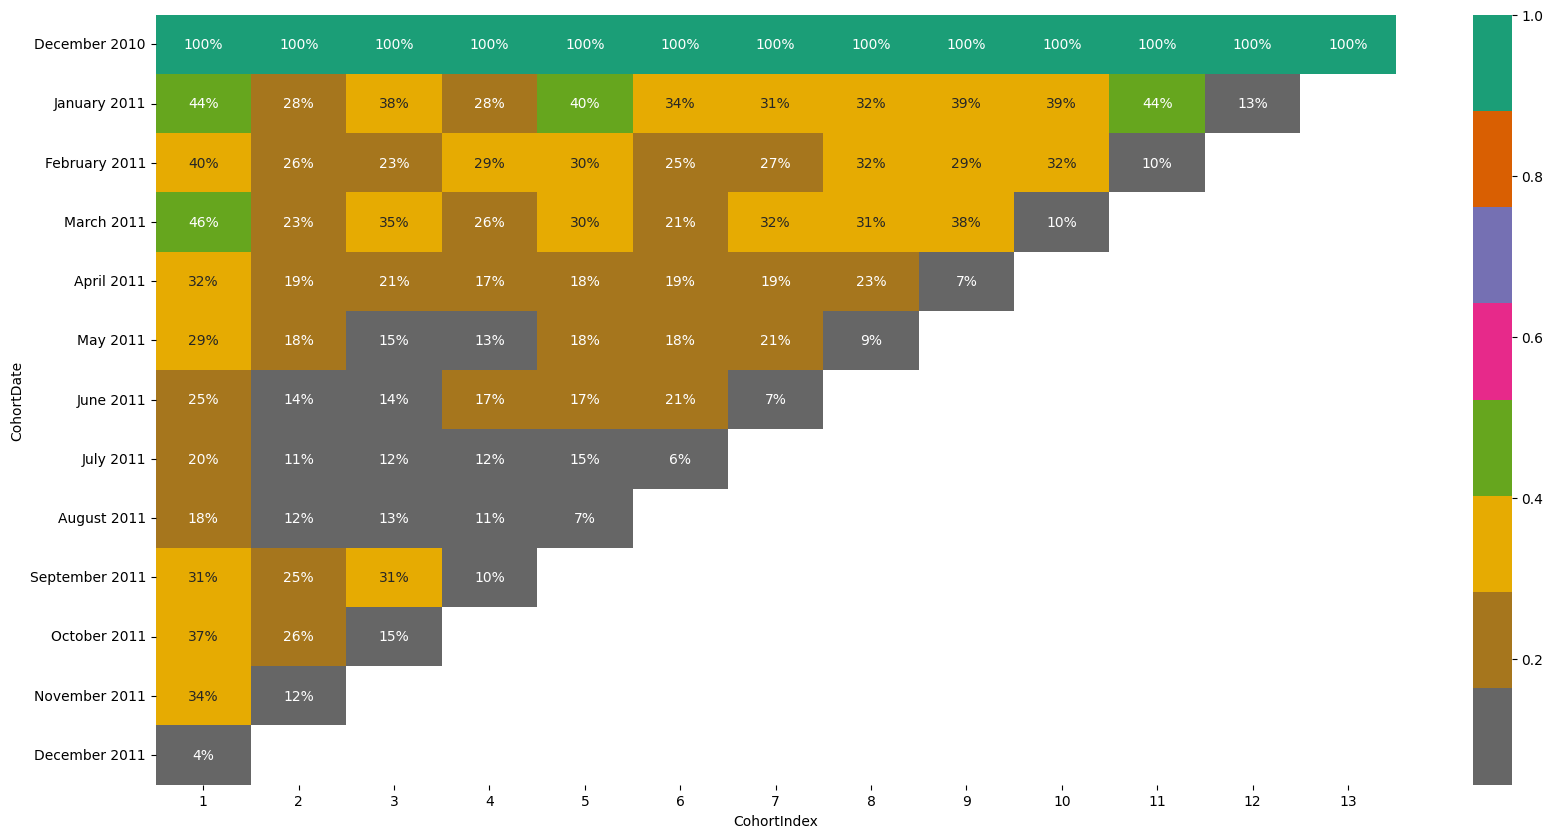

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%',cmap='Dark2_r')
plt.show()

# Quantity_Bought

In [37]:
quantity_bought= Dataset_ecommerce.groupby(['CohortDate','CohortIndex'])['Quantity'].mean().reset_index()
quantity_bought.rename(columns={'Quantity':'Quantity Bought'},inplace=True)
quantity_bought

,CohortDate,CohortIndex,Quantity Bought
0,2010-12-01,1,50.310391
1,2010-12-01,2,50.259443
2,2010-12-01,3,50.351084
3,2010-12-01,4,50.635290
4,2010-12-01,5,50.628518
...,...,...,...
86,2011-10-01,2,49.928081
87,2011-10-01,3,49.367144
88,2011-11-01,1,51.056094
89,2011-11-01,2,48.629340


In [38]:
quantity_bought_table = quantity_bought.pivot_table(index='CohortDate',columns='CohortIndex',values='Quantity Bought')
quantity_bought_table.index = quantity_bought_table.index.strftime('%B %Y')
quantity_bought_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December 2010,50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
January 2011,50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
February 2011,51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
March 2011,50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
April 2011,50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
May 2011,50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
June 2011,50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


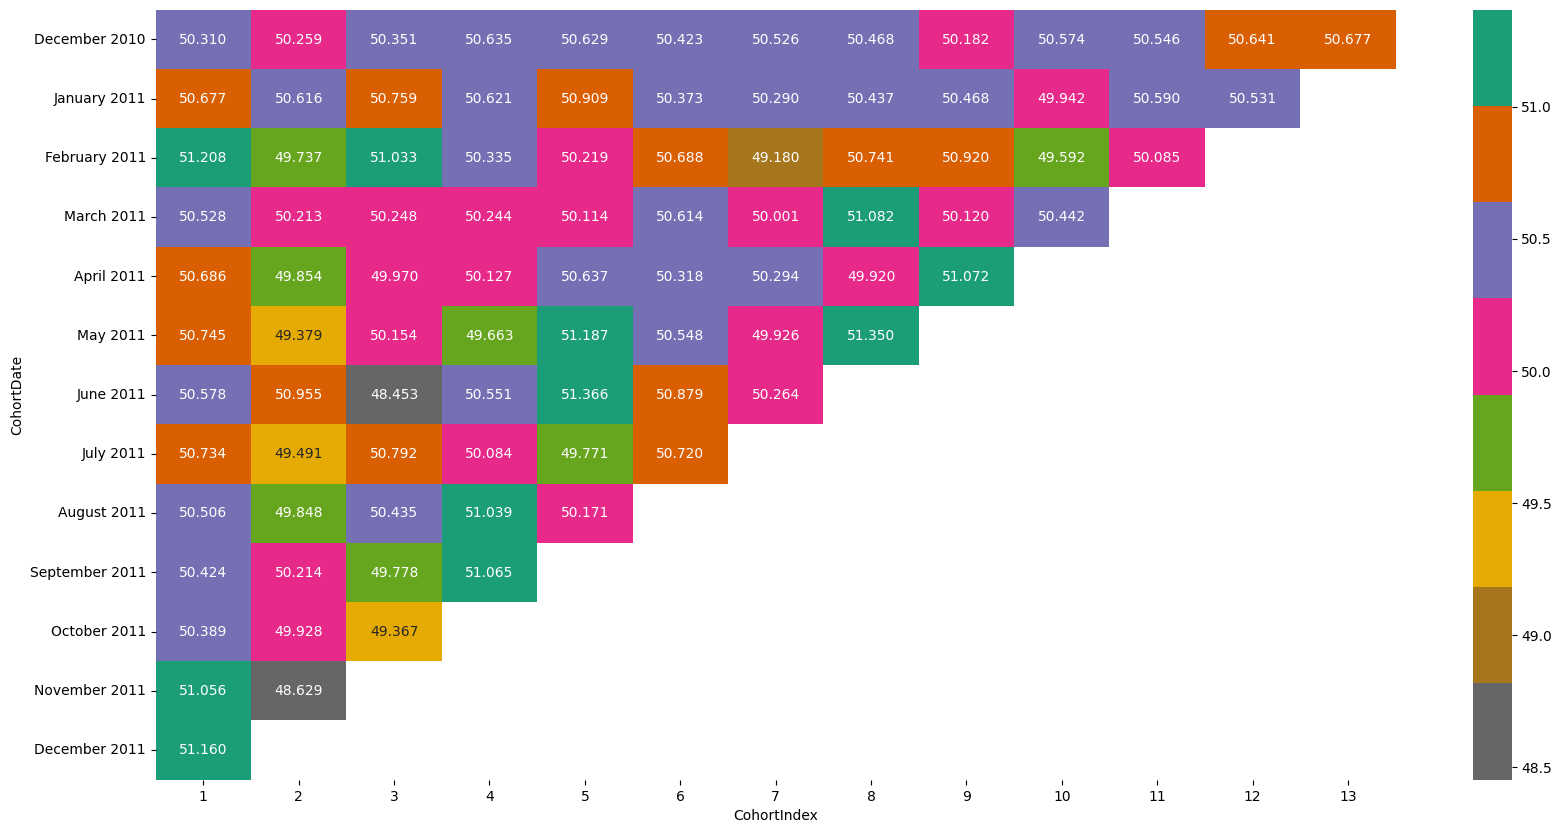

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(quantity_bought_table,annot=True,fmt='.3f',cmap='Dark2_r')
plt.show()

# SENTIMENT ANALYSIS

In [40]:
# carry out sentiment analysis on this project by grouping different class of customers

from textblob import TextBlob  # Import the textblob library

In [47]:

# Create a new column for sentiment scores
Dataset_ecommerce['Sentiment'] = Dataset_ecommerce['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Group by customer segments (e.g., country) and calculate average sentiment
sentiment_by_country = Dataset_ecommerce.groupby('Country')['Sentiment'].mean().reset_index()
sentiment_by_country.tail(20)

,Country,Sentiment
8,Kenya,0.0
9,Libya,0.0
10,Madagascar,0.0
11,Mali,0.0
12,Morocco,0.0
13,Mozambique,0.0
14,Niger,0.0
15,Nigeria,0.0
16,Rwanda,0.0
17,Senegal,0.0


In [42]:
# Example of segmenting customers based on spending and sentiment
# Calculate total spending per customer
customer_spending = Dataset_ecommerce.groupby('CustomerID')['UnitPrice'].sum()

In [43]:
# Categorize customers into spending groups (low, medium, high)
spending_quartiles = pd.qcut(customer_spending, 3, labels=['low', 'medium', 'high'])
spending_quartiles


,UnitPrice
CustomerID,
12346.0,low
12347.0,high
12348.0,medium
12349.0,high
12350.0,low
...,...
18280.0,low
18281.0,low
18282.0,low


In [44]:
Dataset_ecommerce['SpendingGroup'] = Dataset_ecommerce['CustomerID'].map(spending_quartiles)
Dataset_ecommerce.tail(20)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,CohortDate,CohortIndex,Sentiment,SpendingGroup
541889,581585,2011-12-01,15804.0,SC6908,Cloths,12,24.28,Morocco,2011-05-01,8,0.0,high
541890,581586,2011-12-01,13113.0,SC4589,Jewelry,40,56.17,Niger,2010-12-01,13,0.0,high
541891,581586,2011-12-01,13113.0,SC2994,Books,83,83.87,Somalia,2010-12-01,13,0.0,high
541892,581586,2011-12-01,13113.0,SC7051,Books,42,43.79,Cote d'Ivoire,2010-12-01,13,0.0,high
541893,581586,2011-12-01,13113.0,SC5807,Books,6,14.12,South Africa,2010-12-01,13,0.0,high
541894,581587,2011-12-01,12680.0,SC1579,Furniture,71,41.01,South Africa,2011-08-01,5,0.0,medium
541895,581587,2011-12-01,12680.0,SC1458,Cosmetics,55,25.31,Tanzania,2011-08-01,5,0.0,medium
541896,581587,2011-12-01,12680.0,SC8342,Cosmetics,6,20.26,Algeria,2011-08-01,5,0.0,medium
541897,581587,2011-12-01,12680.0,SC2271,Jewelry,66,90.86,Ghana,2011-08-01,5,0.0,medium
541898,581587,2011-12-01,12680.0,SC2285,Toys,71,87.59,Senegal,2011-08-01,5,0.0,medium
